# PROYECTO FINAL IT ACADEMY: DATA SCIENCE

Para este proyecto final, usaré un dataset descargado de la web de Kaggle (www.https://www.kaggle.com/). En concreto, he elegido una base de datos que contiene datos acerca del fracaso escolar en niveles educativos superiores y los factores socioeconómicos potencialmente asociados. 

https://www.kaggle.com/datasets/thedevastator/higher-education-predictors-of-student-retention?resource=download

https://archive-beta.ics.uci.edu/dataset/697/predict+students+dropout+and+academic+success


# 1. Importando los datos

In [1]:
#Importamos las librerías que vamos a utilizar en este proyecto

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Importamos el dataset que vamos a analizar en este proyecto

drop_stud = pd.read_csv('drop_undergraduate.csv')
drop_stud = drop_stud.drop_duplicates()
drop_stud.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [3]:
print(drop_stud.shape[0]) #Número de registros
print(drop_stud.shape[1]) #Número de columnas

4424
35


El dataset se carga de manera correcta. Esta base de datos contiene un total de 4424 registros, que incluyen un total de 35 columnas que contienen variables tanto categóricas como numéricas, todas codificadas con números. Los detalles acerca de la información contenida en cada columna se pueden encontrar en la web ya aportada en la primera celda:

https://archive-beta.ics.uci.edu/dataset/697/predict+students+dropout+and+academic+success

Como primer paso, extraeré una descripción de la base de datos de trabajo.

# 2. Descripción general

Para empezar, veamos una descripción general de cada una de las variables:

In [4]:
drop_stud.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4424 entries, 0 to 4423
Data columns (total 35 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Nacionality                                     4424 non-null   int64  
 7   Mother's qualification                          4424 non-null   int64  
 8   Father's qualification                          4424 non-null   int64  
 9   Mother's occupation                      

Como ya habíamos visto, la base de datos contiene un gran volumen de información. Algo relevante es que todas las columnas contienen datos numéricos, tanto enteros como decimales. No obstante, salta a la vista que algunas de las variables son categóricas (por ejemplo, las ocupaciones de los padres o el género). Esto es importante de cara a cómo tratar los datos a la hora de hacer los análisis 

In [5]:
drop_stud.describe()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,6.886980,1.727848,9.899186,0.890823,2.531420,1.254521,12.322107,16.455244,7.317812,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,5.298964,1.313793,4.331792,0.311897,3.963707,1.748447,9.026251,11.044800,3.997828,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,6.000000,1.000000,1.000000,1.000000,2.000000,3.000000,5.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,8.000000,1.000000,10.000000,1.000000,1.000000,1.000000,13.000000,14.000000,6.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,12.000000,2.000000,13.000000,1.000000,1.000000,1.000000,22.000000,27.000000,10.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,18.000000,9.000000,17.000000,1.000000,17.000000,21.000000,29.000000,34.000000,32.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


Aquí podemos ver una descripción estadística de las distintas variables. Como he comentado antes, hay que tener en cuenta que muchas de estas variables son categóricas, y que los números refieren a códigos y no guardan ningún tipo de relación con el valor asignado.

# 3. Exploración inicial e individual de las variables de interés

Como siguiente paso, empezaremos explorando gráficamente algunas de las variables del estudio, para orientarnos un poco de cara a pasos posteriores.

Empezaremos echando un ojo al target de este estudio:

In [6]:
drop_stud["Target"].value_counts()

Graduate    2209
Dropout     1421
Enrolled     794
Name: Target, dtype: int64

Dropout     1421
Enrolled     794
Graduate    2209
Name: Target, dtype: int64


([<matplotlib.patches.Wedge at 0x1f81d5b1c70>,
 [Text(0.5858965014713851, 0.9309808212651813, 'Dropout'),
  Text(-0.9322269190947655, 0.5839117838467398, 'Enrolled'),
  Text(0.002343522770068781, -1.099997503588543, 'Graduate')],
 [Text(0.3195799098934827, 0.5078077206900988, '32.1%'),
  Text(-0.5084874104153265, 0.3184973366436762, '17.9%'),
  Text(0.001278285147310244, -0.5999986383210233, '49.9%')])

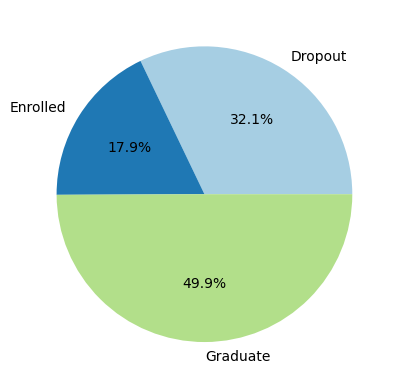

In [7]:
colors = sns.color_palette("Paired")[0:3] #determinamos los colores
targg=drop_stud["Target"].value_counts().sort_index()
print(targg)#para no escribir tanto código
plt.pie(targg, labels=targg.index, colors=colors, autopct='%1.1f%%') #pie chart

Podemos ver que casi el 50% de los alumnos encuestados se ha graduado; sin embargo, un porcentaje bastante elevado (32%) abandonó los estudios.

Analicemos de manera visual algunas de las variables que pueden tener mayor interés en este estudio. En primer lugar, voy a graficar las variables relacionadas con el pago de las tasas y las deudas (Debtor, Tuition fees up to date). Me parecen variables interesantes:

In [8]:
deudores = drop_stud.groupby(['Debtor', 'Target'])['Target'].count() #hago un groupby por situación de deudas y cuento los 
#resultados de la columna target 
total_debt=drop_stud.groupby(['Debtor'])['Debtor'].count() #Miro el total de alumnos con deudas y sin deudas
print(deudores)
print(total_debt)

Debtor  Target  
0       Dropout     1109
        Enrolled     704
        Graduate    2108
1       Dropout      312
        Enrolled      90
        Graduate     101
Name: Target, dtype: int64
Debtor
0    3921
1     503
Name: Debtor, dtype: int64


Observamos varias cosas: en primer lugar, en números absolutos el número de "dropouts" es mayor en el grupo de alumnos sin deuda (1109 vs 312). No obstante, al mirar los números totales, vemos también que el número de alumnos con deudas es mucho menor a los alumnos sin deudas.

Vamos a verlo de manera gráfica para facilitar la comparación:

Debtor  Target  
0       Dropout     28.283601
        Enrolled    17.954603
        Graduate    53.761795
1       Dropout     62.027833
        Enrolled    17.892644
        Graduate    20.079523
dtype: float64


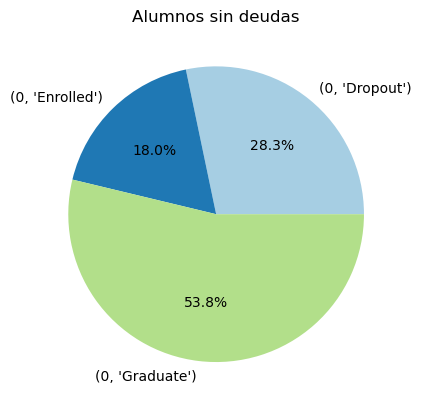

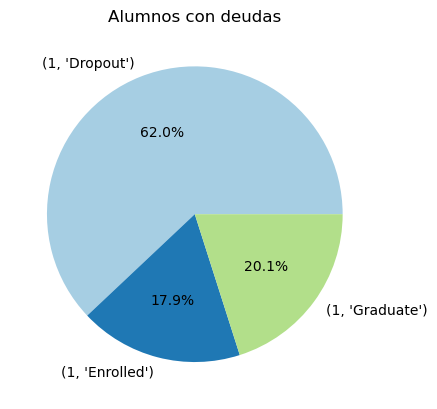

In [9]:
porcentajes=deudores/total_debt*100 #calculo porcentajes
print(porcentajes)

plt.title('Alumnos sin deudas') #ploteo título
plt.pie(porcentajes[:3,], labels=porcentajes[:3,].index, colors=colors, autopct='%1.1f%%') #pie chart
plt.show()

plt.title('Alumnos con deudas') #título
plt.pie(porcentajes[3:6,], labels=porcentajes[3:6,].index, colors=colors, autopct='%1.1f%%') #pie chart
plt.show()

Efectivamente, podemos ver que en los alumnos sin deudas se produce un 28% de abandono. No obstante, cuando nos focalizamos en los alumnos con deudas, este porcentaje incrementa hasta un 62%. Se trata de una diferencia muy considerable. 

Veamos que pasa con los alumnos que no llevan al día el pago de las tasas universitarias:

In [10]:
tu_fee = drop_stud.groupby(['Tuition fees up to date', 'Target'])['Target'].count() #hago un groupby por situación de deudas y cuento los 
#resultados de la columna target 
total_tu_fee=drop_stud.groupby(['Tuition fees up to date'])['Tuition fees up to date'].count() #Miro el total de alumnos con deudas y sin deudas
print(tu_fee)
print(total_tu_fee)

Tuition fees up to date  Target  
0                        Dropout      457
                         Enrolled      42
                         Graduate      29
1                        Dropout      964
                         Enrolled     752
                         Graduate    2180
Name: Target, dtype: int64
Tuition fees up to date
0     528
1    3896
Name: Tuition fees up to date, dtype: int64


Tuition fees up to date  Target  
0                        Dropout     86.553030
                         Enrolled     7.954545
                         Graduate     5.492424
1                        Dropout     24.743326
                         Enrolled    19.301848
                         Graduate    55.954825
dtype: float64


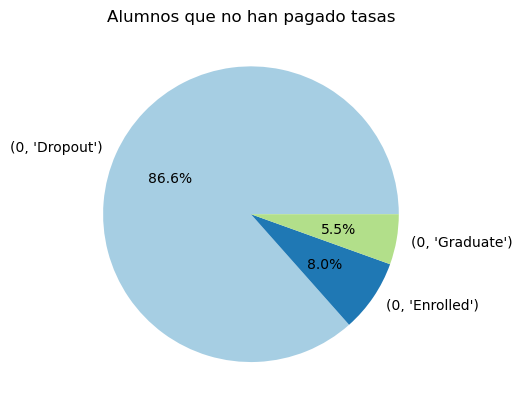

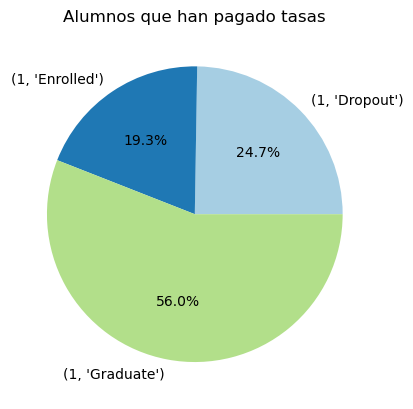

In [11]:
porcentajess=tu_fee/total_tu_fee*100 #calculo porcentajes
print(porcentajess)

plt.title('Alumnos que no han pagado tasas') #ploteo título
plt.pie(porcentajess[:3,], labels=porcentajes[:3,].index, colors=colors, autopct='%1.1f%%') #pie chart
plt.show()

plt.title('Alumnos que han pagado tasas') #título
plt.pie(porcentajess[3:6,], labels=porcentajes[3:6,].index, colors=colors, autopct='%1.1f%%') #pie chart
plt.show()

Como podemos observar, hay un total de 528 alumnos que no han pagado las tasas universitarias. De estos, un 86.6% de ellos han abandonado ya los estudios, mientras que en el caso de los alumnos que han pagado, este porcentaje se reduce a un 24.7%. No obstante, hay que considerar que lo primero que hará un alumno que decide abandonar es dejar de pagar. Así pues, estos resultados podrían ser más una consecuencia del abandono de los estudios, en lugar de la causa. 

Vamos a echar ahora un ojo a qué ocurre según el género del alumnado:

([<matplotlib.axis.XTick at 0x1f81e0635e0>,
 [Text(0, 0, 'Men'), Text(1, 0, 'Women')])

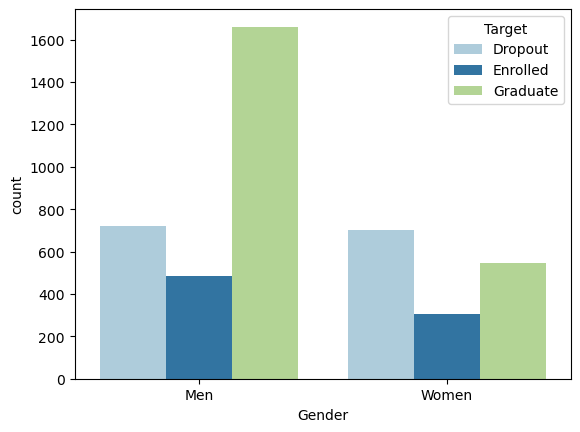

In [12]:
#print(sns.color_palette("Paired").as_hex()[0:3]) 
#Para este tipo de plot (sns.countplot) tengo que poner los códigos HEX. Los extraigo con la línea de arriba y 
#sns.set_theme(style="whitegrid")
sns.countplot(data=drop_stud, x='Gender', hue='Target',hue_order=['Dropout','Enrolled', 'Graduate'], palette=['#a6cee3', '#1f78b4', '#b2df8a'])
plt.xticks(ticks=[0,1], labels=['Men','Women'])

#hue_order=drop_stud['Target'].value_counts().index - Si quisiera ordenar por counts

Observamos varias cosas: En primer lugar, la cantidad de mujeres matriculadas en estudios superiores es inferior a la cantidad de hombres. En segundo lugar, aunque el número total de abandonos es similar en ambos sexos, la proporción será muy distinta. Calculemos de nuevo los porcentajes:

In [13]:
geneross = drop_stud.groupby(['Gender', 'Target'])['Target'].count() #hago un groupby por situación de deudas y cuento los 
#resultados de la columna target 
total_gen=drop_stud.groupby(['Gender'])['Gender'].count() #Miro el total de alumnos con deudas y sin deudas
porcentajes_gen=geneross/total_gen*100 #calculo porcentajes
print(porcentajes_gen)

Gender  Target  
0       Dropout     25.104603
        Enrolled    16.980474
        Graduate    57.914923
1       Dropout     45.051414
        Enrolled    19.730077
        Graduate    35.218509
dtype: float64


Observamos que mientras que el porcentaje de abandonos en hombres es del 25%, en mujeres asciende hasta un 45%. Se trata de un resultado bastante interesante que evidencia un potencial efecto del sexo en el abandono de los estudios

Por último, como parte de esta exploración inicial, veamos cómo correlacionan las notas del primer y segundo semestre:

<AxesSubplot:xlabel='Curricular units 2nd sem (grade)', ylabel='Curricular units 1st sem (grade)'>

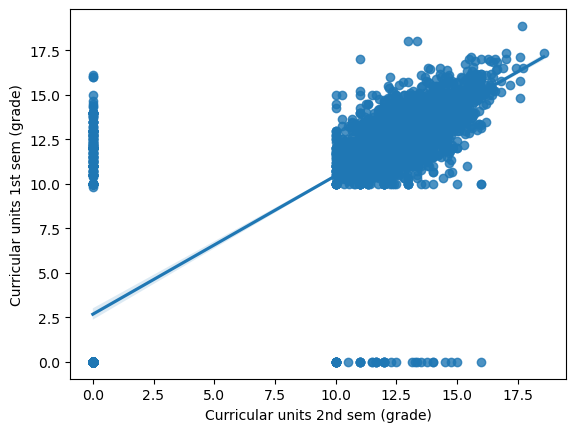

In [14]:
sns.regplot(data=drop_stud, x="Curricular units 2nd sem (grade)", y="Curricular units 1st sem (grade)")

<AxesSubplot:xlabel='Curricular units 2nd sem (grade)', ylabel='Curricular units 1st sem (grade)'>

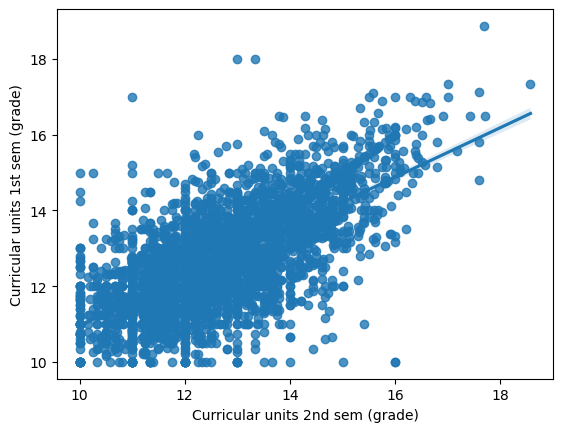

In [15]:
mini_set_regre = drop_stud.drop(drop_stud[drop_stud['Curricular units 2nd sem (grade)'] == 0].index)
mini_set_regre = mini_set_regre.drop(mini_set_regre[mini_set_regre['Curricular units 1st sem (grade)'] == 0].index)

sns.regplot(data=mini_set_regre, x="Curricular units 2nd sem (grade)", y="Curricular units 1st sem (grade)")

Una vez eliminados los datos que distorsionaban los resultados, podemos ver una que las notas del primer y segundo semestre parecen correlacionar. 

Antes de terminar, hagamos un estudio general de las correlaciones que existen entre todas las variables a través de un heatmap. Hay que repetir que algunas de estas variables, a pesar de ser numéricas, son categóricas. Por tanto, a la hora de interpretar el resultado de este gráfico lo tendremos que tener en mente: 

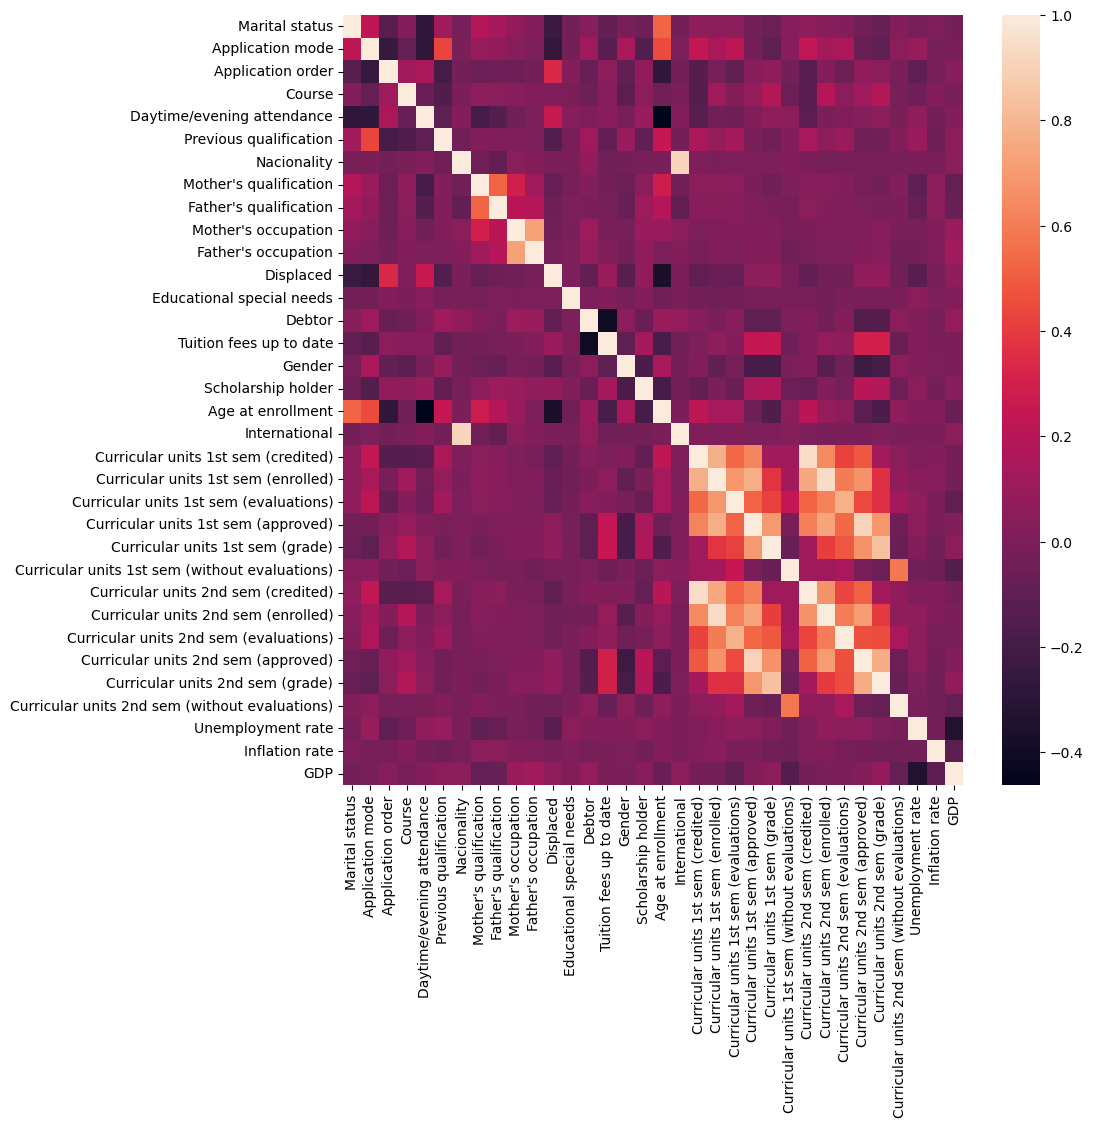

In [16]:
stud_corr = drop_stud.corr()
plt.figure(figsize=(10,10))
sns.heatmap(stud_corr)
plt.show()

Como ya podíamos sospechar, las variables relacionadas directamente con las notas y el rendimiento académico están muy correlacionadas entre ellas (asignaturas cursadas, aprobadas, notas medias de los distintos semestres...). De cara a la predicción, se podría estudiar eliminar alguna de estas variables, ya que nos están proporcionando información correlacionada. Otro caso especialmente evidente son las variables nacionalidad e internacional, que básicamente nos están proporcionando la misma información de manera más o menos detallada. Finalmente, las variables de la ocupación materna y paterna también exhiben cierto nivel de correlación.

# Modelos de predicción - algoritmo supervisado
    

Para este proyecto, **quiero predecir la variable "Target"**, en concreto, si los alumnos se van a graduar o van a dejar los estudios. Para ello, **usaré modelos basados en algoritmos de aprendizaje supervisado (clasificación).**

La pipeline que seguiré consta de los siguientes pasos:

    1. Eliminación de registros de alumnos que siguen cursando los estudios, eliminación de variables repetitivas basandome en los análisis previos de regresión. Combinación de variables redundantes.
    
    2. Creación de los datasets train / test

    3. Transformación y normalización de las variables 
    
    4. Creación y entreno del modelo (Logistic regression). Rendimiento del modelo (confussion matrix)
    
    5. Creación y entreno del modelo (Random Forest Classifier). Rendimiento del modelo (2).
    
Además de trabajar con varios modelos distintos **(logistic regression, random forest classifier)**, he querido realizar el paso de preprocesado siguiendo dos metodologías distintas:

- Standarizando con StandarScaler() - apartado anterior

- Creando una pipeline específica para poder trabajar con variables categóricas y numéricas de manera simultanea (seguiremos esta pipeline: https://inria.github.io/scikit-learn-mooc/python_scripts/03_categorical_pipeline_column_transformer.html)

Cabe destacar que esta segunda metodología requeriría o a) menos categorías totales en las variables categóricas b) mayor cantidad de registros c) Menos variables categóricas.

De todos modos, presento su potencial uso ya que creo que puede ser de especial utilidad ante este tipo de datos


# 4. Modelos de predicción con algoritmos supervisados - preprocesado estandar

## 4.1. PREPROCESADO (CLEANING): Eliminación de registros y variables, combinación de variables

**Este apartado será común para todos los modelos que realizaré**

Primero voy a eliminar aquellos registros que siguen cursando los estudios, ya que son alumnos que, en este caso, no me aportan información relevante y podrían distorsionar el modelo:

In [17]:
final_dataset = drop_stud.drop(drop_stud[drop_stud['Target']=='Enrolled'].index)
final_dataset["Target"].value_counts()

Graduate    2209
Dropout     1421
Name: Target, dtype: int64

Ahora voy a eliminar algunas variables que considero redundantes. Para simplificar un poco, me quedaré con la variable nacionalidad (más detallada) y quitaré la variable internacional. Por otra parte, tampoco me interesa el application mode (tengo ya el orden de aplicación, que además resulta una información más comprensible para mi).

In [18]:
final_dataset=final_dataset.drop(['Application mode', 'International'], axis=1)
final_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3630 entries, 0 to 4423
Data columns (total 33 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  3630 non-null   int64  
 1   Application order                               3630 non-null   int64  
 2   Course                                          3630 non-null   int64  
 3   Daytime/evening attendance                      3630 non-null   int64  
 4   Previous qualification                          3630 non-null   int64  
 5   Nacionality                                     3630 non-null   int64  
 6   Mother's qualification                          3630 non-null   int64  
 7   Father's qualification                          3630 non-null   int64  
 8   Mother's occupation                             3630 non-null   int64  
 9   Father's occupation                      

Veamos ahora las variables relacionadas con resultados curriculares, que en el apartado 3 hemos comprobado que presentaan altos niveles de correlación. Cabe destacar que hay algunas variables en las cuales no termino de entender la diferencia (por ejemplo, "enrolled" vs "evaluations" vs "credited").

Haremos alguna exploración adicional antes de tomar decisiones:

In [19]:
pd.set_option('display.max_columns', None) #Podemos ver todas las columnas, para tener una idea de los valores que nos encontramos
final_dataset[:10]

,Marital status,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,5,2,1,1,1,13,10,6,10,1,0,0,1,1,0,20,0,0,0,0,0.000000,0,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,1,11,1,1,1,1,3,4,4,1,0,0,0,1,0,19,0,6,6,6,14.000000,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,5,5,1,1,1,22,27,10,10,1,0,0,0,1,0,19,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,2,15,1,1,1,23,27,6,4,1,0,0,1,0,0,20,0,6,8,6,13.428571,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,1,3,0,1,1,22,28,10,10,0,0,0,1,0,0,45,0,6,9,5,12.333333,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
5,2,1,17,0,12,1,22,27,10,8,0,0,1,1,1,0,50,0,5,10,5,11.857143,0,0,5,17,5,11.500000,5,16.2,0.3,-0.92,Graduate
6,1,1,12,1,1,1,13,28,8,11,1,0,0,1,0,1,18,0,7,9,7,13.300000,0,0,8,8,8,14.345000,0,15.5,2.8,-4.06,Graduate
7,1,4,11,1,1,1,22,27,10,10,1,0,0,0,1,0,22,0,5,5,0,0.000000,0,0,5,5,0,0.000000,0,15.5,2.8,-4.06,Dropout
8,1,3,10,1,1,15,1,1,10,10,0,0,0,1,0,1,21,0,6,8,6,13.875000,0,0,6,7,6,14.142857,0,16.2,0.3,-0.92,Graduate
9,1,1,10,1,1,1,1,14,5,8,1,0,1,0,0,0,18,0,6,9,5,11.400000,0,0,6,14,2,13.500000,0,8.9,1.4,3.51,Dropout


En los primeros registros ya aprecio alguna cosa rara, como por ejemplo que las asignaturas "credited" son 0, mientras que para los mismos registros hay asignaturas aprobadas y puntuadas. También veo que en algunos casos, la columna de asignaturas evaluadas contiene valores mayores que la columna de asignaturas cursadas, a lo cual no le encuentro mucho sentido. De todos modos, vayamos a asegurarnos de todas estas cosas:

In [20]:
aa= final_dataset["Curricular units 1st sem (enrolled)"] - final_dataset["Curricular units 1st sem (approved)"]

print(aa)
(aa < 0).values.any()

0       0
1       0
2       6
3       0
4       1
       ..
4419    1
4420    0
4421    0
4422    0
4423    0
Length: 3630, dtype: int64


False

In [21]:
bb= final_dataset["Curricular units 1st sem (evaluations)"] - final_dataset["Curricular units 1st sem (enrolled)"]

print(bb)
(bb < 0).values.any()

0       0
1       0
2      -6
3       2
4       3
       ..
4419    1
4420    0
4421    1
4422    0
4423    2
Length: 3630, dtype: int64


True

Como se puede ver, la columna de "evaluations" parece referirse a algo más general, en lugar de a las asignaturas evaluadas por alumno; de ser una variable específica para cada alumno, las asignaturas evaluadas **jamás** deberían contener un número mayor al número de asignaturas que cursa el alumno. 

De la misma manera, como también puede verse en el apartado 2 con el comando "describe", las asignaturas "credited" son en la mayoría de casos 0, lo cual tampoco es coherente con los números que se presentan en las asignaturas cursadas (columna enrrolled) y aprovadas (columna approved). Lo mismo sucede con las columnas "without evaluations". 

Por tanto, decido prescindir de las 6 variables (2 por cada semestre) que contienen ese tipo de información:

In [22]:
final_dataset=final_dataset.drop(['Curricular units 1st sem (evaluations)', 'Curricular units 2nd sem (evaluations)', 'Curricular units 2nd sem (credited)', 'Curricular units 1st sem (credited)', 'Curricular units 2nd sem (without evaluations)', 'Curricular units 1st sem (without evaluations)'], axis=1)
final_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3630 entries, 0 to 4423
Data columns (total 27 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Marital status                       3630 non-null   int64  
 1   Application order                    3630 non-null   int64  
 2   Course                               3630 non-null   int64  
 3   Daytime/evening attendance           3630 non-null   int64  
 4   Previous qualification               3630 non-null   int64  
 5   Nacionality                          3630 non-null   int64  
 6   Mother's qualification               3630 non-null   int64  
 7   Father's qualification               3630 non-null   int64  
 8   Mother's occupation                  3630 non-null   int64  
 9   Father's occupation                  3630 non-null   int64  
 10  Displaced                            3630 non-null   int64  
 11  Educational special needs     

Por último, para finalizar con esta parte del preprocesado, voy a crear dos nuevas columnas (una para cada semestre) combinando la información de la columna enrrolled y approved para crear un porcentaje de asignaturas aprovadas para cada alumno (approved/enrolled). El resultado lo daré en tanto por uno.

Una vez hecho esto, eliminaré las columnas originales. Al fin y al cabo, la información de asignaturas aprovadas no tiene valor per se si no se tiene en cuenta las asignaturas que cursaba el alumno.

In [23]:
final_dataset['Curricular units 1st semester (approved mean)'] = final_dataset['Curricular units 1st sem (approved)'] / final_dataset['Curricular units 1st sem (enrolled)']
#nos aseguramos que no haya nada raro, como un valor por debajo de 0
(final_dataset['Curricular units 1st semester (approved mean)'] < 0).values.any()

False

In [24]:
#repetimos el proceso para el 2nd semestre:
final_dataset['Curricular units 2nd semester (approved mean)'] = final_dataset['Curricular units 2nd sem (approved)'] / final_dataset['Curricular units 2nd sem (enrolled)']
#nos aseguramos que no haya nada raro, como un valor por debajo de 0
(final_dataset['Curricular units 2nd semester (approved mean)'] < 0).values.any()

False

In [25]:
#comprobamos el head y que las columnas se hayan creado correctamente:
final_dataset.head()

,Marital status,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,Curricular units 1st sem (enrolled),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Unemployment rate,Inflation rate,GDP,Target,Curricular units 1st semester (approved mean),Curricular units 2nd semester (approved mean)
0,1,5,2,1,1,1,13,10,6,10,1,0,0,1,1,0,20,0,0,0.000000,0,0,0.000000,10.8,1.4,1.74,Dropout,NaN,NaN
1,1,1,11,1,1,1,1,3,4,4,1,0,0,0,1,0,19,6,6,14.000000,6,6,13.666667,13.9,-0.3,0.79,Graduate,1.000000,1.000000
2,1,5,5,1,1,1,22,27,10,10,1,0,0,0,1,0,19,6,0,0.000000,6,0,0.000000,10.8,1.4,1.74,Dropout,0.000000,0.000000
3,1,2,15,1,1,1,23,27,6,4,1,0,0,1,0,0,20,6,6,13.428571,6,5,12.400000,9.4,-0.8,-3.12,Graduate,1.000000,0.833333
4,2,1,3,0,1,1,22,28,10,10,0,0,0,1,0,0,45,6,5,12.333333,6,6,13.000000,13.9,-0.3,0.79,Graduate,0.833333,1.000000


In [26]:
#eliminamos las columnas que ya no son necesarias
final_dataset=final_dataset.drop(['Curricular units 1st sem (approved)', 'Curricular units 2nd sem (enrolled)', 'Curricular units 2nd sem (approved)', 'Curricular units 1st sem (enrolled)'], axis=1)
final_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3630 entries, 0 to 4423
Data columns (total 25 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Marital status                                 3630 non-null   int64  
 1   Application order                              3630 non-null   int64  
 2   Course                                         3630 non-null   int64  
 3   Daytime/evening attendance                     3630 non-null   int64  
 4   Previous qualification                         3630 non-null   int64  
 5   Nacionality                                    3630 non-null   int64  
 6   Mother's qualification                         3630 non-null   int64  
 7   Father's qualification                         3630 non-null   int64  
 8   Mother's occupation                            3630 non-null   int64  
 9   Father's occupation                            3630 

Finalizamos este apartado con 24 variables (de las 34 originales) que contienen toda la información que nos interesa incluir en el modelo. 

## 4.2. División en train / test datasets

Una vez terminada la limpieza de los datos, vamos a proseguir con el siguiente paso: dividir el dataset en los subconjuntos "train" y "test". Resulta importante realizar este paso antes de la normalización de los datos, aunque como veremos en el caso del apartado 5, pueden haber situaciones que lo dificulten.

In [27]:
#import de train_test split, que usaremos para dividir los datos:
from sklearn.model_selection import train_test_split

In [28]:
#creación de la variable X con todas las variables excepto Target
X = final_dataset.loc[:, final_dataset.columns != 'Target']
#comprobación:
#print(X)

In [29]:
y = final_dataset.Target
#comprobación:
print(y)
#o y = final_dataset['Target']

0        Dropout
1       Graduate
2        Dropout
3       Graduate
4       Graduate
          ...   
4419    Graduate
4420     Dropout
4421     Dropout
4422    Graduate
4423    Graduate
Name: Target, Length: 3630, dtype: object


In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [31]:
print(y_train)

1116     Dropout
4372     Dropout
4371    Graduate
2869    Graduate
1638     Dropout
          ...   
1359     Dropout
1559    Graduate
1037    Graduate
4278    Graduate
3867    Graduate
Name: Target, Length: 2904, dtype: object


In [33]:
#print(X_train)

## 4.3 Estandarización

Ahora prosigamos con la estandarización de los datos. En este primer apartado lo voy a hacer de la manera más sencilla posible, que es usando StandardScaler para todas las variables. Esto es posible porque aunque tenemos bastantes variables categóricas, todas ellas se codifican de manera numérica.

Después veremos por qué este sistema me crea reticiencias.

In [32]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X_train) #estandarizo en base al dataset train
xtrain_sc = scaler.transform(X_train) #transformo dataset train
xtest_sc = scaler.transform(X_test) #transformo dataset test

La variable Y (a predecir) no es necesario transformarla

In [33]:
print(xtrain_sc)
np.isnan(np.sum(xtrain_sc))

[[-0.29922036 -0.5639619  -1.13003853 ...  0.77497081 -2.03932097
  -1.78492015]
 [-0.29922036 -0.5639619  -1.36023156 ...  0.79712735 -2.03932097
  -1.78492015]
 [-0.29922036  3.17006766  0.48131271 ...  0.79712735  0.75813082
   0.80793631]
 ...
 [-0.29922036 -0.5639619   0.02092664 ...  0.77497081  0.75813082
   0.80793631]
 [-0.29922036  0.92964992  1.17189181 ...  0.89904744  0.75813082
   0.80793631]
 [-0.29922036 -0.5639619   0.48131271 ...  0.77497081  0.40844934
   0.48382925]]


True

Hay valores NA / infinito (aunque hemos visto que en el dataset original no habían). Estos se pueden haber producido durante la estandarización, y es necesario eliminarlos

In [34]:
xtrain_sc = np.nan_to_num(xtrain_sc, copy=False) #cambio los NAN

In [35]:
np.isnan(np.sum(xtrain_sc)) #compruebo que ya no hay NAN

False

In [36]:
np.isnan(np.sum(xtest_sc)) #repito lo mismo para el dataset test

True

In [37]:
xtest_sc = np.nan_to_num(xtest_sc, copy=False)
np.isnan(np.sum(xtest_sc))

False

## 4.4. Modelo de clasificación supervisada: Logistic regression

In [38]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state=42,  max_iter=10000) #fijo random state y el máximo de iteraciones

Antes de proseguir, usaré GridSearchCV para determinar los mejores parámetros del modelo. Para ver qué parámetros pueden interesarme, he usado como referencia: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [39]:
from sklearn.model_selection import GridSearchCV #Esto permite mejorar los parámetros del modelo

# Find the best parameters for the model
parameters = {
    'C': [0.1, 0.5, 1, 5, 10, 50, 100],
    'solver': ['lbfgs', 'liblinear', 'newton-cg','sag', 'saga'],
    'verbose':[0,1,2,3,4]
}

gridforest = GridSearchCV(logreg, parameters, cv = 5, n_jobs = -1, verbose = 1)

gridforest.fit(xtrain_sc, y_train)
gridforest.best_params_

Fitting 5 folds for each of 175 candidates, totalling 875 fits


{'C': 0.5, 'solver': 'lbfgs', 'verbose': 0}

Tanto "solver" como "verbose" deberían quedarse con sus valores default. El único parámetro que recomienda cambiar es la "C"

In [40]:
logreg = LogisticRegression(random_state=42,  max_iter=10000, C=0.5) #fijo random state y el máximo de iteraciones

In [41]:
# fit del modelo con los datos, usando los subdatasets de TRAIN
logreg.fit(xtrain_sc, y_train)

#predicción, usando el xTEST
y_pred = logreg.predict(xtest_sc)

Ahora voy a ver unas cuantas métricas, a ver qué tal funciona el modelo. Empiezo con la **confusion matrix**

In [42]:
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[233,  44],
       [ 19, 430]], dtype=int64)

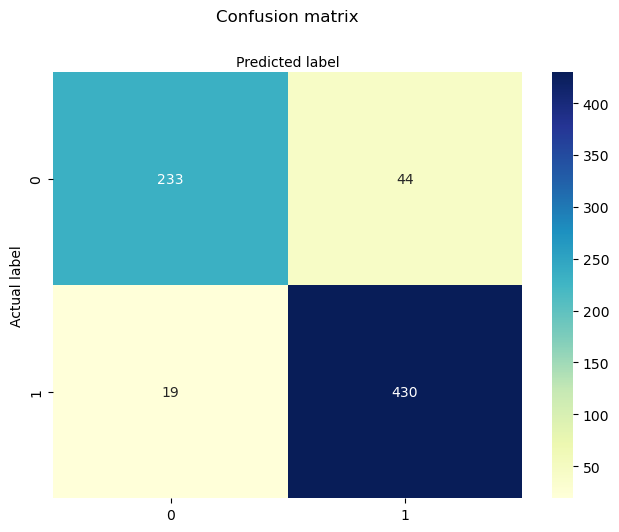

In [43]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label');

Observamos que el modelo lo hace bastante bien, aunque a algunos estudiantes que acaban abandonando los estudios los predice como que se graduan (44 asignaciones incorrectas). 

Veamos otras métricas más específicas, como por ejemplo las que proporciona el "classification report":

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html

In [44]:
from sklearn.metrics import classification_report

target_names = ['Dropout', 'Graduate']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     Dropout       0.92      0.84      0.88       277
    Graduate       0.91      0.96      0.93       449

    accuracy                           0.91       726
   macro avg       0.92      0.90      0.91       726
weighted avg       0.91      0.91      0.91       726



La **precisión** mide la exactitud de las predicciones positivas (que podemos ver que en ambos casos es alta). El **recall** mide cómo de completas están estas predicciones positivas, que podemos ver que en el caso de los Dropout es algo más baja (como hemos visto, hay 44 estudiantes que son asignados de manera incorrecta al grupo de graduados)

Finalmente, **F1-score** es la media harmónica de la precisión y el recall, por lo cual nos da un indicador general de cómo de bueno es nuestro modelo. Nuevamente, podemos ver que nuestro modelo predice mejor los graduados que los abandonos.

Y finalmente, si quisieramos comprobar que la accuracy anterior es correcta, también podría calcularse de esta manera:

In [45]:
print(round(metrics.accuracy_score(y_test, y_pred),2))

0.91


Como podemos ver, el modelo no está mal. El siguiente paso que podemos hacer es explorar qué variables tienen un mayor peso en nuestro modelo.

https://inria.github.io/scikit-learn-mooc/python_scripts/dev_features_importance.html

Empezaré extrayendo los coeficientes para plotearlos de manera entendible:

In [46]:
weights = logreg.coef_

print(weights)
np.shape(weights)

[[ 0.15641885  0.02522018 -0.31865461 -0.09207079  0.01304598  0.03776766
  -0.09457827  0.08209468  0.19104877  0.05753984 -0.08379672 -0.0225396
  -0.28065878  0.92540625 -0.19736774  0.36703127 -0.3391805  -0.21265496
   0.42496847 -0.13674493  0.0352557  -0.07402144  1.29369401  2.43712068]]


(1, 24)

In [47]:
coefss=np.reshape(weights, (24,1)) #reestructuro la matriz para que en vez de ser una fila sea una columna

coefss = pd.DataFrame( #la convierto en un dataframe
   coefss)
#print(coefss)

titulos=X_train.columns #extraigo los nombres de las distintas variables
print(type(titulos)) #compruebo que es pandas
titulos=titulos.to_numpy() #lo paso a numpy

coefss.index=titulos #añado los cabezales a cada fila, que son los títulos de las variable
coefss.columns=["Coeficientes"] #pongo título a la columna
print(coefss)

<class 'pandas.core.indexes.base.Index'>
                                               Coeficientes
Marital status                                     0.156419
Application order                                  0.025220
Course                                            -0.318655
Daytime/evening attendance                        -0.092071
Previous qualification                             0.013046
Nacionality                                        0.037768
Mother's qualification                            -0.094578
Father's qualification                             0.082095
Mother's occupation                                0.191049
Father's occupation                                0.057540
Displaced                                         -0.083797
Educational special needs                         -0.022540
Debtor                                            -0.280659
Tuition fees up to date                            0.925406
Gender                                            -0.197368

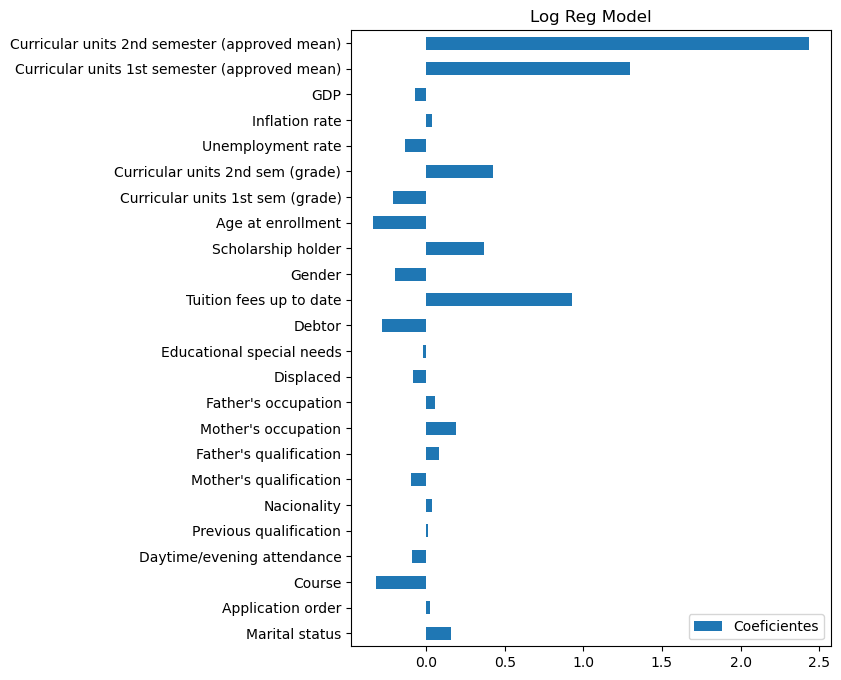

In [48]:
coefss.plot(kind='barh', figsize=(8, 8))
plt.title('Log Reg Model')
plt.subplots_adjust(left=.3)

Podemos ver que las variables con una mayor influencia en el modelo son el % de las asignaturas aprovadas (especialmente las del segundo semestre) y el la variable acerca del pago de tasas.

Aunque este modelo no está mal, voy a probar otro:

## 4.4. Modelo de clasificación supervisada: RandomForest Classifier

In [53]:
from sklearn.ensemble import RandomForestClassifier
from random import randint

rfc = RandomForestClassifier(criterion = 'entropy', random_state = 42)

In [57]:
# Find the best parameters for the model
parameters = {
    'n_estimators': [50, 100, 150, 200, 250],
    'max_depth': [3,5,10,15,20],
    'min_samples_split': [2,3,4,5,10]
}

gridforest = GridSearchCV(rfc, parameters, cv = 5, n_jobs = -1, verbose = 1)

gridforest.fit(xtrain_sc, y_train)
gridforest.best_params_

Fitting 5 folds for each of 125 candidates, totalling 625 fits


{'max_depth': 15, 'min_samples_split': 5, 'n_estimators': 100}

Actualizo el modelo con los hiperparámetros más óptimos (ojo, el comando anterior es lentillo)

In [59]:
rfc = RandomForestClassifier(criterion = 'entropy', random_state = 42, n_estimators= 100, max_depth=15, min_samples_split=5)

In [60]:
# fit del modelo con los datos, usando los subdatasets de TRAIN
rfc.fit(xtrain_sc, y_train)

#predicción, usando el xTEST
y_pred_rf = rfc.predict(xtest_sc)

In [61]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred_rf)
cnf_matrix

array([[232,  45],
       [ 19, 430]], dtype=int64)

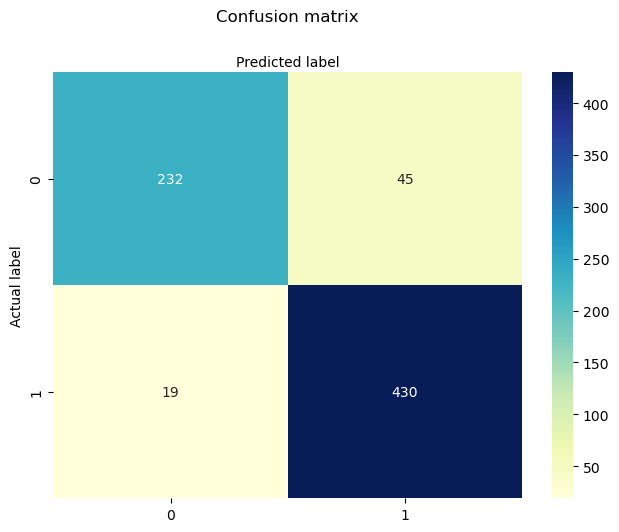

In [62]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label');

Los resultados son prácticamente idénticos a los que ya habíamos obtenido en el ejercicio anterior. Veamos las métricas detalladas:

In [63]:
target_names = ['Dropout', 'Graduate']
print(classification_report(y_test, y_pred_rf, target_names=target_names))

              precision    recall  f1-score   support

     Dropout       0.92      0.84      0.88       277
    Graduate       0.91      0.96      0.93       449

    accuracy                           0.91       726
   macro avg       0.91      0.90      0.90       726
weighted avg       0.91      0.91      0.91       726



Como puede verse, nuevamente los resultados son extremadamente iguales. Antes de pasar a ver las variables más explicativas, voy a graficar los 3 primeros decision trees, para tener una mejor idea de lo que está sucediendo:

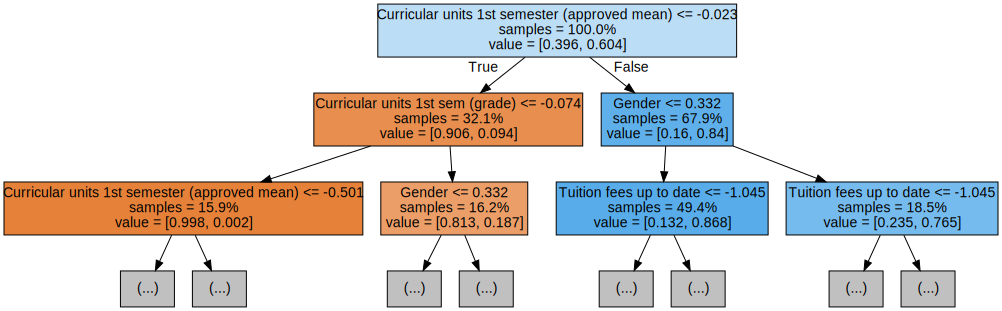

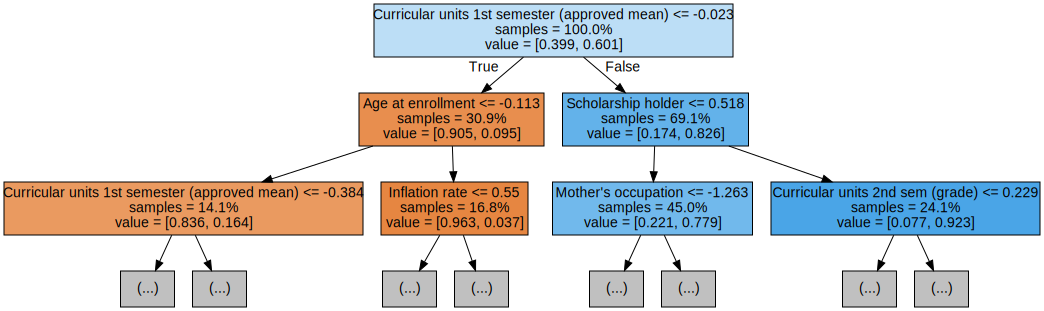

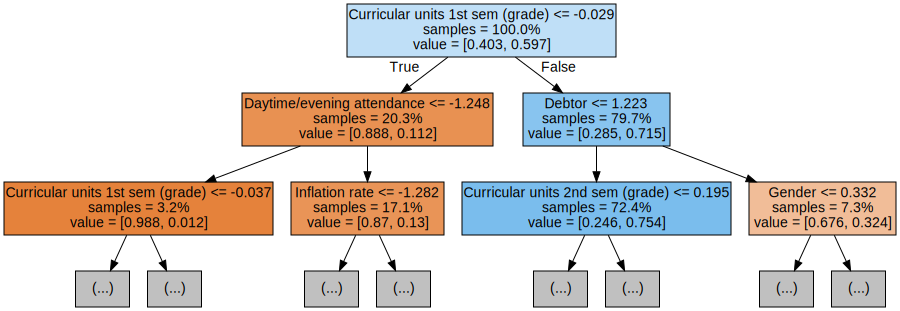

In [73]:
# Exportar los decision tree de los random forest.

#IMPORTANTE!! Instalar graphviz desde Anaconda:
# conda install -c anaconda python-graphviz
# conda install -c anaconda pydot

from sklearn.tree import export_graphviz
import graphviz

for i in range(3):
    tree = rfc.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=titulos,  
                               filled=True,  
                               max_depth=2, 
                               impurity=False, 
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

Para facilitar la visualización, tan solo grafico hasta una profundidad máxima de 2 (recordemos que la profundidad la había fijado en máximo 15, así que habrá árboles muy grandes). Podemos comprobar que la primera variable que se utiliza para la primera elección es el % de asignaturas aprovadas el primer semestre y, en el último caso, la nota del primer semestre. 

Vamos a ver por último que variables tienen mayor peso en la clasificación, tal y como hemos hecho con la regresión logística:

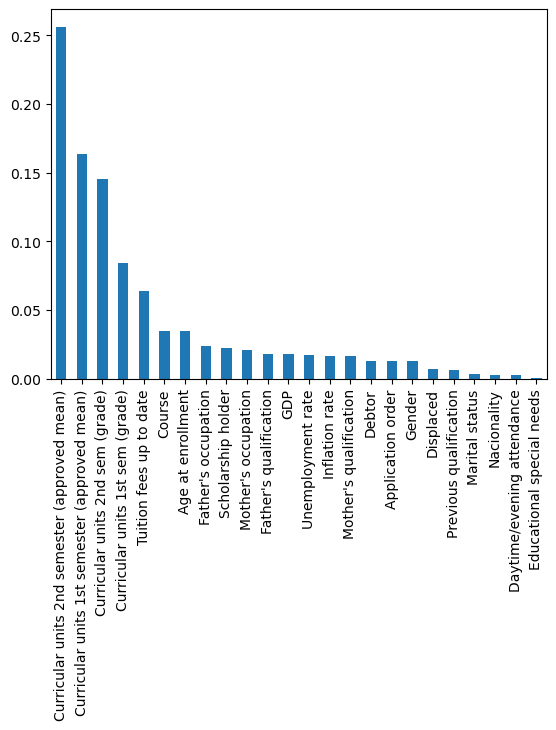

In [77]:
# Creamos una serie que contiene las variables de importancia para el modelo
variables_importantes = pd.Series(rfc.feature_importances_, index=titulos).sort_values(ascending=False)

# Graficamos
variables_importantes.plot.bar();

Al igual que en la regresion logística, las variables de mayor importancia son el % de asignaturas aprovadas. En este caso, estas variables están seguidas de las notas y del pago de las tasas

# 5. Modelos de predicción con algoritmos supervisados - preprocesado específico

Una cosa que me preocupaba de este dataset es que muchas de las categorías que estoy tratando como numéricas son en realidad categóricas. Tras investigar, decidí hacer una prueba para preprocesar de manera independiente las columnas numéricas (mediante Standard Scaling) y categóricas (mediante OneHotEncoder). Inicialmente mi idea hacerlo de manera independiente para los datasets de train y test aunque, como veremos a continuación, eso no fue posible.

En primer lugar, establezco qué columnas son numéricas y qué columnas son categóricas:

In [78]:
numerical_columns = final_dataset[['Application order', 'Previous qualification', 'Age at enrollment', 'Curricular units 1st sem (grade)', 'Curricular units 2nd sem (grade)', 'Unemployment rate', 'Inflation rate', 'GDP', 'Curricular units 1st semester (approved mean)', 'Curricular units 2nd semester (approved mean)']]
list(numerical_columns.columns)
numeric_title=list(numerical_columns.columns)
print(numeric_title)

['Application order', 'Previous qualification', 'Age at enrollment', 'Curricular units 1st sem (grade)', 'Curricular units 2nd sem (grade)', 'Unemployment rate', 'Inflation rate', 'GDP', 'Curricular units 1st semester (approved mean)', 'Curricular units 2nd semester (approved mean)']


In [79]:
categorical_columns = final_dataset.drop(['Application order', 'Previous qualification', 'Age at enrollment', 'Curricular units 1st sem (grade)', 'Curricular units 2nd sem (grade)', 'Unemployment rate', 'Inflation rate', 'GDP', 'Curricular units 1st semester (approved mean)', 'Curricular units 2nd semester (approved mean)', 'Target'], axis=1)
list(categorical_columns.columns)
categorical_title=list(categorical_columns.columns)
print(categorical_title)

['Marital status', 'Course', 'Daytime/evening attendance', 'Nacionality', "Mother's qualification", "Father's qualification", "Mother's occupation", "Father's occupation", 'Displaced', 'Educational special needs', 'Debtor', 'Tuition fees up to date', 'Gender', 'Scholarship holder']


A continuación, establezco los dos preprocesados que usaré:

In [80]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler

categorical_preprocessor = OneHotEncoder()
numerical_preprocessor = StandardScaler()

In [81]:
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer([
    ('one-hot-encoder', categorical_preprocessor, categorical_title),
    ('standard_scaler', numerical_preprocessor, numeric_title)])

preprocessor

ColumnTransformer(transformers=[('one-hot-encoder', OneHotEncoder(),
                                 ['Marital status', 'Course',
                                  'Daytime/evening attendance', 'Nacionality',
                                  "Mother's qualification",
                                  "Father's qualification",
                                  "Mother's occupation", "Father's occupation",
                                  'Displaced', 'Educational special needs',
                                  'Debtor', 'Tuition fees up to date', 'Gender',
                                  'Scholarship holder']),
                                ('standard_scaler', StandardScaler(),
                                 ['Application order', 'Previous qualification',
                                  'Age at enrollment',
                                  'Curricular units 1st sem (grade)',
                                  'Curricular units 2nd sem (grade)',
                             

Hecho! Como puede verse, mi preprocessor lo que hará es coger las columnas categóricas y transformarlas usando One-Hot-Encoder; por otro lado, cogerá las columnas numéricas y las transformará haciendo uso de Standard Scaler. 

A continuación, intentaré transformar de manera independiente los datasets de train y test:

In [85]:
prepro = preprocessor.fit(X_train)
XX_train = prepro.transform(X_train)
print(XX_train)
print(XX_train.shape)
type(XX_train)

  (0, 0)	1.0
  (0, 10)	1.0
  (0, 24)	1.0
  (0, 25)	1.0
  (0, 46)	1.0
  (0, 99)	1.0
  (0, 106)	1.0
  (0, 143)	1.0
  (0, 173)	1.0
  (0, 174)	1.0
  (0, 176)	1.0
  (0, 178)	1.0
  (0, 180)	1.0
  (0, 182)	1.0
  (0, 184)	-0.5639619038338041
  (0, 185)	-0.39290902480256107
  (0, 186)	-0.5621820189466948
  (0, 187)	-2.0716189459913226
  (0, 188)	-1.806616176535886
  (0, 189)	-0.309492065312257
  (0, 190)	0.1190333444443432
  (0, 191)	0.7749708114739764
  (0, 192)	-2.0393209682456335
  (0, 193)	-1.7849201529264878
  (1, 0)	1.0
  :	:
  (2902, 193)	0.8079363092579235
  (2903, 0)	1.0
  (2903, 17)	1.0
  (2903, 24)	1.0
  (2903, 25)	1.0
  (2903, 56)	1.0
  (2903, 85)	1.0
  (2903, 109)	1.0
  (2903, 143)	1.0
  (2903, 172)	1.0
  (2903, 174)	1.0
  (2903, 176)	1.0
  (2903, 179)	1.0
  (2903, 181)	1.0
  (2903, 182)	1.0
  (2903, 184)	-0.5639619038338041
  (2903, 185)	-0.39290902480256107
  (2903, 186)	-0.30526541134244556
  (2903, 187)	0.7973267748864215
  (2903, 188)	0.8295585923434272
  (2903, 189)	-0.309492

scipy.sparse._csr.csr_matrix

Como puede verse, da lugar a una matriz **enorme** con unas 2900 columnas! Esto se debe al One-Hot-Encoder y al hecho de que tenemos muchas variables categóricas con muchas categorías internas. Es probable que, para una determinada combinación de variables categóricas, tan solo tengamos un registro representativo. 

Limpiaré los NAN y trataré de transformar el dataset de test:

In [86]:
XX_train.data = np.nan_to_num(XX_train.data, copy=False)
np.isnan(np.sum(XX_train))

False

In [88]:
XX_test=prepro.transform(X_test)
print(XX_test)

ValueError: Found unknown categories [16] in column 4 during transform

Error! ¿Qué es lo que sucede? Pues que como ya se podía suponer, al haber tantas combinaciones de variables categóricas hay algunas que están presentes en el test data pero no en el train data (y viceversa). Esto hace que después de entrenar el preprocesador con el subset Train no podamos aplicarlo al subset Test. 

¿Qué posibles soluciones tendría esto? Lo más adecuado sería:

1. Ampliar el dataset con más registros
2. Eliminar categorías y variables categóricas con poco interés o frecuencia. Al no ser datos con los que estoy familiarizada, no creo que resulte adecuado (de hecho ya he realizado un buen cleaning al principio), pero sería otra estrategia a seguir

El preprocesado funciona, ya que he hecho una prueba alternativa preprocesando todos los datos y dividiéndolos en los subsets de train y test a posteriori. De todos modos, no considero que sea un método adecuado, ya que estoy condicionando previamente al modelo.